In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # 这里只需要使用x，为了对应接口才拿出y的（同时为了上色演示）

x_train = x_train.astype('float32') / 255.  # minmax归一
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
# 建立模型
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 2

img_size = Input(shape=(784, ))

# 编码
encoded = Dense(128, activation='relu')(img_size)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# 解码
decoded = Dense(16, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

autoencoder = Model(inputs=img_size, outputs=decoded)
encoder = Model(inputs=img_size, outputs=encoder_output)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_23 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_24 (Dense)             (None, 64)                1088      
__________

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0504
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0434
Epoch 3/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0412
Epoch 4/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0402
Epoch 5/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0396
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0394
Epoch 7/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0387
Epoch 8/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0384
Epoch 9/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0379
Epoch 10/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0378
Epoch 11/20
60000/60000 [==============================] - 8s 133us/step - loss:

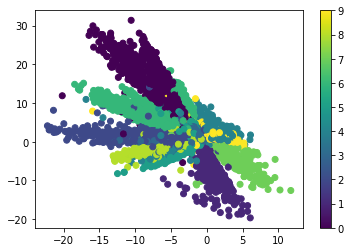

In [9]:
autoencoder.fit(x_train, x_train, batch_size=32, epochs=20, shuffle=True, verbose=True)

encoded_imgs = encoder.predict(x_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()
